In [1]:
import pandas as pd
music_data = (['the rolling stones', 'Satisfaction'], ['Beatles', 'Let It Be'], ['Guns N’ Roses',
'Don’t Cry'], ['Metallica', 'Nothing Else Matters'])
df = pd.DataFrame(data=music_data, columns=['singer', 'songname'])
df

,singer,songname
0,the rolling stones,Satisfaction
1,Beatles,Let It Be
2,Guns N’ Roses,Don’t Cry
3,Metallica,Nothing Else Matters


In [2]:
import pandas as pd
score = pd.read_csv('/Users/hukeer/Desktop/score.csv',encoding="utf-8")
score

,学号,姓名,性别,语文,数学,英语
0,1001,郭靖,男,85.0,93.0,82
1,1002,杨过,男,80.0,85.0,86
2,1003,令狐冲,男,87.0,80.0,78
3,1004,黄蓉,女,88.0,71.0,92
4,1005,王语嫣,女,78.0,95.0,87
5,1006,韦小宝,男,45.0,72.0,99
6,1007,小龙女,女,NaN,NaN,NaN
7,1008,张无忌,男,67.0,56.0,缺考
8,1009,周芷若,女,82.0,80.0,40


In [3]:
# 删除 score 对象中的空值
score = score.dropna()
score

,学号,姓名,性别,语文,数学,英语
0,1001,郭靖,男,85.0,93.0,82
1,1002,杨过,男,80.0,85.0,86
2,1003,令狐冲,男,87.0,80.0,78
3,1004,黄蓉,女,88.0,71.0,92
4,1005,王语嫣,女,78.0,95.0,87
5,1006,韦小宝,男,45.0,72.0,99
7,1008,张无忌,男,67.0,56.0,缺考
8,1009,周芷若,女,82.0,80.0,40


In [4]:
# 删除 score 对象中英语为“缺考”的记录
score = score.drop(score[score['英语'].isin(['缺考'])].index)
score

,学号,姓名,性别,语文,数学,英语
0,1001,郭靖,男,85.0,93.0,82
1,1002,杨过,男,80.0,85.0,86
2,1003,令狐冲,男,87.0,80.0,78
3,1004,黄蓉,女,88.0,71.0,92
4,1005,王语嫣,女,78.0,95.0,87
5,1006,韦小宝,男,45.0,72.0,99
8,1009,周芷若,女,82.0,80.0,40


In [5]:
# 输出 score 对象的前三行
score['英语'] = pd.to_numeric(score['英语'])
score.head(3)

,学号,姓名,性别,语文,数学,英语
0,1001,郭靖,男,85.0,93.0,82
1,1002,杨过,男,80.0,85.0,86
2,1003,令狐冲,男,87.0,80.0,78


In [6]:
# score 对象新增一列“总分”，值为前三列成绩之和
score['总分'] = score.loc[:,['语文','数学','英语']].sum(axis=1)
score

,学号,姓名,性别,语文,数学,英语,总分
0,1001,郭靖,男,85.0,93.0,82,260.0
1,1002,杨过,男,80.0,85.0,86,251.0
2,1003,令狐冲,男,87.0,80.0,78,245.0
3,1004,黄蓉,女,88.0,71.0,92,251.0
4,1005,王语嫣,女,78.0,95.0,87,260.0
5,1006,韦小宝,男,45.0,72.0,99,216.0
8,1009,周芷若,女,82.0,80.0,40,202.0


In [7]:
# score 对象依据“总分”列的值从高到低进行排序
score.sort_values(by='总分',ascending=False,inplace=True)
score

,学号,姓名,性别,语文,数学,英语,总分
0,1001,郭靖,男,85.0,93.0,82,260.0
4,1005,王语嫣,女,78.0,95.0,87,260.0
1,1002,杨过,男,80.0,85.0,86,251.0
3,1004,黄蓉,女,88.0,71.0,92,251.0
2,1003,令狐冲,男,87.0,80.0,78,245.0
5,1006,韦小宝,男,45.0,72.0,99,216.0
8,1009,周芷若,女,82.0,80.0,40,202.0


In [8]:
# score 对象根据性别进行分组，输出男生、女生各自的平均成绩
score.groupby(by='性别').mean()

,学号,语文,数学,英语,总分
性别,,,,,
女,1006.0,82.666667,82.0,73.00,237.666667
男,1003.0,74.250000,82.5,86.25,243.000000


In [9]:
# score 对象新增一列“等级”，总分大于 260 的等级为 A，总分小于 210 的等级为 C，总分介于 210 到 260 的等级为 B
score['等级'] = 0
score.loc[score['总分']>=260,'等级'] = 'A'
score.loc[score['总分']<210,'等级'] = 'C'
score.loc[(score['总分']<260) & (score['总分']>210),'等级'] = 'B'
score

,学号,姓名,性别,语文,数学,英语,总分,等级
0,1001,郭靖,男,85.0,93.0,82,260.0,A
4,1005,王语嫣,女,78.0,95.0,87,260.0,A
1,1002,杨过,男,80.0,85.0,86,251.0,B
3,1004,黄蓉,女,88.0,71.0,92,251.0,B
2,1003,令狐冲,男,87.0,80.0,78,245.0,B
5,1006,韦小宝,男,45.0,72.0,99,216.0,B
8,1009,周芷若,女,82.0,80.0,40,202.0,C


In [10]:
# 查询出 score 对象中语文成绩小于 60 或者总分低于 250 的所有学生信息
score[(score['语文'] < 60) | (score['总分'] < 250)]

,学号,姓名,性别,语文,数学,英语,总分,等级
2,1003,令狐冲,男,87.0,80.0,78,245.0,B
5,1006,韦小宝,男,45.0,72.0,99,216.0,B
8,1009,周芷若,女,82.0,80.0,40,202.0,C


In [11]:
import matplotlib.pyplot as plt

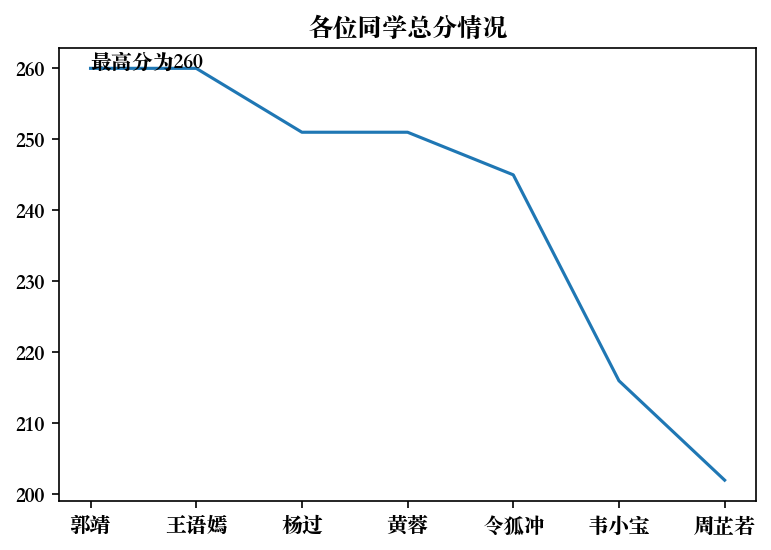

In [12]:
# 用 matplotlib 库绘制出折线图(plot)，样张如下:
x = score['姓名']
y = score['总分'].values
plt.rcParams['font.family'] = 'Songti SC' 
plt.figure(dpi=150)
plt.title('各位同学总分情况')
plt.text(x = '郭靖',y = score['总分'].max(),s = '最高分为{}'.format(int(score['总分'].max())))
plt.plot(x,y)
plt.show()

#  根据已经生成的箱线图，回答以下问题: 
### 1 哪门课程的成绩分布比较集中 $语文$
### 2 哪门课程的分数总体比较好 $英语$
### 3 哪门课存在异常值 $英语$
### 4 哪门课的平均值高于中位数 $数学$

In [13]:
tips = pd.read_csv('/Users/hukeer/Desktop/tips.csv',encoding="utf-8")
tips

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


In [14]:
# 请分析小餐馆中女性的平均消费高还是男性的平均消费高，文件中的 total_bill 为消费 金额。
tips.groupby(by='sex').mean()
# 男性的平均消费高

,Unnamed: 0,total_bill,tip,size
sex,,,,
Female,128.080460,18.056897,2.833448,2.459770
Male,117.853503,20.744076,3.089618,2.630573


In [15]:
# 请用 pyecharts 绘制女性中吸烟与不吸烟顾客的消费金额(total_bill)与小费(tip)之 间的散点图关系，样张如下。
from pyecharts.charts import Scatter
import pyecharts.options as opts

In [16]:
chart = tips[tips['sex'] == 'Female']
chart1 = chart[chart['smoker'] == 'Yes']
chart2 = chart[chart['smoker'] == 'No']

In [17]:
x1 = chart1['total_bill']
y1 = chart1['tip']
x2 = chart2['total_bill']
y2 = chart2['tip']
scatter = (
    Scatter(init_opts=opts.InitOpts(width="720px", height="480px"))
    .add_xaxis(xaxis_data=x1)
    .add_yaxis(series_name='吸烟',y_axis=list(y1))
    .add_yaxis(series_name='不吸烟关系',y_axis=list(y2))
    .set_global_opts(
        title_opts = opts.TitleOpts('吸烟女性的消费金额与小费关系')
    )
)
scatter.render_notebook()